## Getting Data

In [1]:
from pycaret.datasets import get_data
diabetes=get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## setting up environment

In [2]:
from pycaret.classification import *
exp1=setup(diabetes,target='Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2288
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## compare models

In [3]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.745,0,0.5292,0.6974,0.5937,0.4125
1,Linear Discriminant Analysis,0.745,0.8162,0.5289,0.6984,0.5931,0.4121
2,Logistic Regression,0.7412,0.8038,0.5132,0.6861,0.5802,0.399
3,CatBoost Classifier,0.7338,0.8068,0.5617,0.6366,0.5952,0.3982
4,Extra Trees Classifier,0.7283,0.7886,0.4871,0.6548,0.5531,0.365
5,Extreme Gradient Boosting,0.7263,0.8065,0.5614,0.6258,0.5893,0.3851
6,Gradient Boosting Classifier,0.7245,0.7956,0.5509,0.6239,0.5833,0.3787
7,Random Forest Classifier,0.7227,0.7725,0.445,0.6618,0.5254,0.341
8,Light Gradient Boosting Machine,0.7113,0.7792,0.5395,0.6011,0.5659,0.3511
9,Ada Boost Classifier,0.7077,0.7811,0.5404,0.5988,0.5646,0.3457


## create model

In [4]:
adaboost=create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6481,0.7353,0.4737,0.5000,0.4865,0.2192
1,0.7222,0.8090,0.5263,0.6250,0.5714,0.3682
2,0.8148,0.9188,0.5789,0.8462,0.6875,0.5624
3,0.7407,0.8203,0.6842,0.6190,0.6500,0.4449
4,0.5741,0.6075,0.4211,0.4000,0.4103,0.0773
5,0.7037,0.7774,0.5263,0.5882,0.5556,0.3344
6,0.7222,0.7970,0.5263,0.6250,0.5714,0.3682
7,0.7358,0.8111,0.6667,0.6000,0.6316,0.4266
8,0.6415,0.6944,0.4444,0.4706,0.4571,0.1899
9,0.7736,0.8397,0.5556,0.7143,0.6250,0.4664


In [31]:
adaboost.decision_function

<bound method AdaBoostClassifier.decision_function of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2288)>

In [32]:
adaboost.feature_importances_

array([0.3 , 0.04, 0.04, 0.1 , 0.1 , 0.22, 0.1 , 0.  , 0.02, 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.02, 0.  ,
       0.02, 0.  ])

In [33]:
adaboost.classes_

array([0, 1], dtype=int64)

In [34]:
adaboost.random_state

2288

## Tune model

In [5]:
tuned_adaboost=tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7037,0.8135,0.5789,0.5789,0.5789,0.3504
1,0.7963,0.8496,0.6842,0.7222,0.7027,0.5479
2,0.8333,0.8932,0.6842,0.8125,0.7429,0.6209
3,0.7593,0.8737,0.6316,0.6667,0.6486,0.4658
4,0.6111,0.6346,0.4737,0.4500,0.4615,0.1575
5,0.7778,0.8511,0.6316,0.7059,0.6667,0.5008
6,0.7407,0.8271,0.5263,0.6667,0.5882,0.4028
7,0.7736,0.8492,0.7222,0.6500,0.6842,0.5085
8,0.6981,0.7635,0.4444,0.5714,0.5000,0.2886
9,0.7925,0.8444,0.5000,0.8182,0.6207,0.4890


## Ensemble Model

In [9]:
## creating a decision tree model
dt=create_model('dt')



,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5926,0.5654,0.4737,0.4286,0.4500,0.1278
1,0.6111,0.5797,0.4737,0.4500,0.4615,0.1575
2,0.7037,0.6752,0.5789,0.5789,0.5789,0.3504
3,0.7407,0.6797,0.4737,0.6923,0.5625,0.3874
4,0.6481,0.6083,0.4737,0.5000,0.4865,0.2192
5,0.8148,0.7729,0.6316,0.8000,0.7059,0.5735
6,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175
7,0.6981,0.6635,0.5556,0.5556,0.5556,0.3270
8,0.6792,0.6897,0.7222,0.5200,0.6047,0.3466
9,0.7925,0.7484,0.6111,0.7333,0.6667,0.5178


In [8]:
## ensembling a trained dt model
dt_bagged=ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.7774,0.5263,0.6250,0.5714,0.3682
1,0.6667,0.7444,0.4737,0.5294,0.5000,0.2512
2,0.7593,0.8722,0.5789,0.6875,0.6286,0.4524
3,0.8148,0.8541,0.5263,0.9091,0.6667,0.5507
4,0.5926,0.6105,0.3158,0.4000,0.3529,0.0616
5,0.7778,0.8263,0.5789,0.7333,0.6471,0.4882
6,0.7407,0.8098,0.4737,0.6923,0.5625,0.3874
7,0.6981,0.7714,0.6111,0.5500,0.5789,0.3447
8,0.7170,0.7889,0.4444,0.6154,0.5161,0.3234
9,0.7736,0.7778,0.5000,0.7500,0.6000,0.4508


## Plot Model

In [10]:
## create a model
adaboost=create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6481,0.7353,0.4737,0.5000,0.4865,0.2192
1,0.7222,0.8090,0.5263,0.6250,0.5714,0.3682
2,0.8148,0.9188,0.5789,0.8462,0.6875,0.5624
3,0.7407,0.8203,0.6842,0.6190,0.6500,0.4449
4,0.5741,0.6075,0.4211,0.4000,0.4103,0.0773
5,0.7037,0.7774,0.5263,0.5882,0.5556,0.3344
6,0.7222,0.7970,0.5263,0.6250,0.5714,0.3682
7,0.7358,0.8111,0.6667,0.6000,0.6316,0.4266
8,0.6415,0.6944,0.4444,0.4706,0.4571,0.1899
9,0.7736,0.8397,0.5556,0.7143,0.6250,0.4664


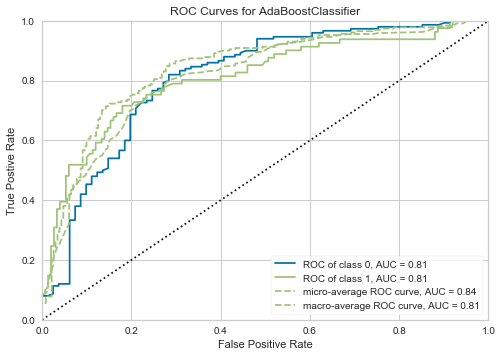

In [11]:
## auc plot
plot_model(adaboost,'auc')

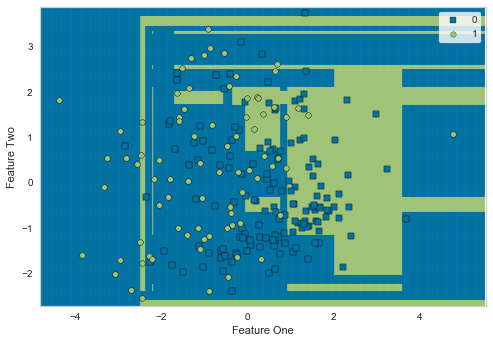

In [12]:
## decision boundry
plot_model(adaboost,'boundary')

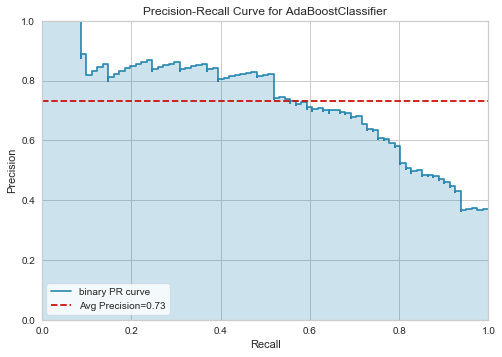

In [13]:
## precision recall curve
plot_model(adaboost,'pr')

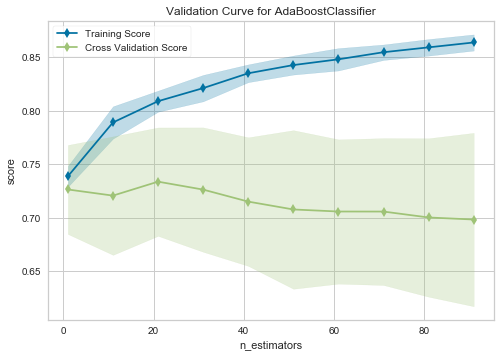

In [14]:
## validation curve
plot_model(adaboost,plot='vc')

In [15]:
evaluate_model(adaboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# interpret model

In [16]:
## create a model 
xgboost=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7037,0.8075,0.6316,0.5714,0.6000,0.3656
1,0.6667,0.7789,0.4737,0.5294,0.5000,0.2512
2,0.8333,0.9053,0.6316,0.8571,0.7273,0.6112
3,0.7222,0.8481,0.5789,0.6111,0.5946,0.3836
4,0.6111,0.6662,0.4211,0.4444,0.4324,0.1370
5,0.7963,0.8256,0.6316,0.7500,0.6857,0.5367
6,0.7407,0.8180,0.5789,0.6471,0.6111,0.4176
7,0.7358,0.8460,0.6667,0.6000,0.6316,0.4266
8,0.6792,0.7556,0.4444,0.5333,0.4848,0.2548
9,0.7736,0.8143,0.5556,0.7143,0.6250,0.4664


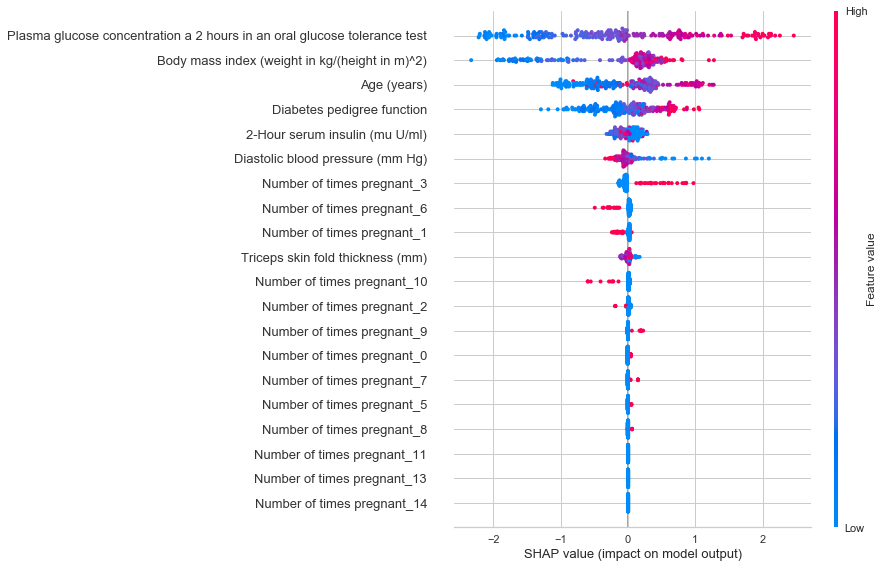

In [17]:
## summary plot
interpret_model(xgboost)

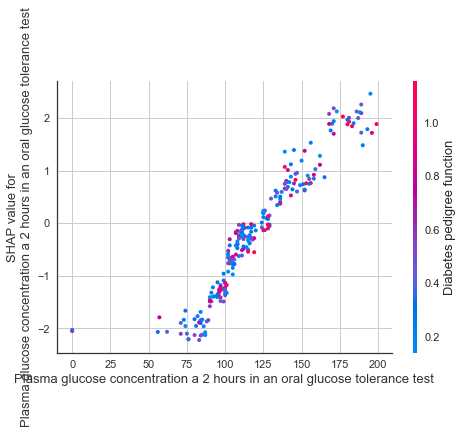

In [18]:
## correlation plot
interpret_model(xgboost,plot='correlation')

In [19]:
interpret_model(xgboost,plot='reason',observation=0)

## Predict Model

In [20]:
## create a model
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6111,0.7647,0.2632,0.4167,0.3226,0.0690
1,0.7222,0.7368,0.4737,0.6429,0.5455,0.3520
2,0.7778,0.8737,0.4211,0.8889,0.5714,0.4462
3,0.7593,0.8692,0.4737,0.7500,0.5806,0.4236
4,0.6111,0.5797,0.4211,0.4444,0.4324,0.1370
5,0.7593,0.8301,0.4737,0.7500,0.5806,0.4236
6,0.7222,0.7541,0.3684,0.7000,0.4828,0.3170
7,0.8113,0.8730,0.7222,0.7222,0.7222,0.5794
8,0.7358,0.6881,0.4444,0.6667,0.5333,0.3592
9,0.7170,0.7556,0.3889,0.6364,0.4828,0.3032


In [21]:
##predict test/ hold-out dataset
rf_holdout_pred=predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.7273,0.8021,0.4321,0.6731,0.5263,0.3474


In [23]:
predictions=predict_model(rf,data=diabetes)
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1,0.9
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.2
764,2,122,70,27,0,36.8,0.340,27,0,0,0.0
765,5,121,72,23,112,26.2,0.245,30,0,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1,0.8


## Deploy MOdel

In [1]:
#deploy_model(model=rf,model_name='rf_aws',platform='aws',authentication = {'bucket' : 'pycaret-test'})

## Save MODEL OR SAVE ENVIRONMENT

In [28]:
## creating model
adaboost=create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6481,0.7353,0.4737,0.5000,0.4865,0.2192
1,0.7222,0.8090,0.5263,0.6250,0.5714,0.3682
2,0.8148,0.9188,0.5789,0.8462,0.6875,0.5624
3,0.7407,0.8203,0.6842,0.6190,0.6500,0.4449
4,0.5741,0.6075,0.4211,0.4000,0.4103,0.0773
5,0.7037,0.7774,0.5263,0.5882,0.5556,0.3344
6,0.7222,0.7970,0.5263,0.6250,0.5714,0.3682
7,0.7358,0.8111,0.6667,0.6000,0.6316,0.4266
8,0.6415,0.6944,0.4444,0.4706,0.4571,0.1899
9,0.7736,0.8397,0.5556,0.7143,0.6250,0.4664


In [29]:
# saving model
save_model(adaboost,model_name='ada_for_deployment')

Transformation Pipeline and Model Succesfully Saved


In [30]:
save_experiment(experiment_name='pycaret_beginning')

Experiment Succesfully Saved
